소음 수치 반영하여 음성을 청취합니다. 61.21975126180792
목소리를 들을 준비가 되었습니다. 말씀해주세요 :)

렇잘 먹고 잘 자고 건강하세요이


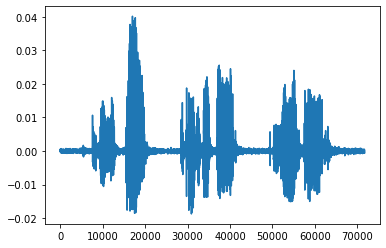

In [8]:
import torch
import torch.nn as nn
from torch import Tensor
import torchaudio
import numpy as np
import librosa

from matplotlib import pyplot as plt
%matplotlib inline
import librosa.display
import IPython.display as ipd

from GetSpeech import get_speech
from tools import revise
from kospeech.vocabs.ksponspeech import KsponSpeechVocabulary
from kospeech.models import DeepSpeech2

def parser(signal, audio_extension: str = 'pcm') -> Tensor:

    feature = torchaudio.compliance.kaldi.fbank(
        waveform=Tensor(signal).unsqueeze(0),
        num_mel_bins=80,
        frame_length=20,
        frame_shift=10,
        window_type='hamming'
    ).transpose(0, 1).numpy()

    feature -= feature.mean()
    feature /= np.std(feature)

    return torch.FloatTensor(feature).transpose(0, 1)

model_path = "./model_ds2.pt"
device = "cpu"

# Get Speech data
audiodata = get_speech()
wav_data = librosa.util.buf_to_float(audiodata)

# Transform to input
feature = parser(wav_data)
input_length = torch.LongTensor([len(feature)])
vocab = KsponSpeechVocabulary('./aihub_character_vocabs.csv')

# Load Kospeech Models
model = torch.load(model_path, map_location=lambda storage, loc: storage).to(device)
if isinstance(model, nn.DataParallel):
    model = model.module
    
model.device = device
y_hats = model.recognize(feature.unsqueeze(0), input_length)
sentence = vocab.label_to_string(y_hats.cpu().detach().numpy())

plt.plot(wav_data)

print('')
print(revise(sentence))
ipd.Audio(wav_data, rate=16000)